In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dataset_path = 'C:/Users/AHM ISRAFIL/Documents/ANACONDA/EEG Signal/images/train/'
validation_dataset_path = 'C:/Users/AHM ISRAFIL/Documents/ANACONDA/EEG Signal/images/test/'

In [3]:
IMG_WIDTH = 360
IMG_HEIGHT = 360
BATCH_SIZE = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 1704 images belonging to 3 classes.


In [5]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 428 images belonging to 3 classes.


In [6]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : NEGATIVE
1 : NEUTRAL
2 : POSITIVE


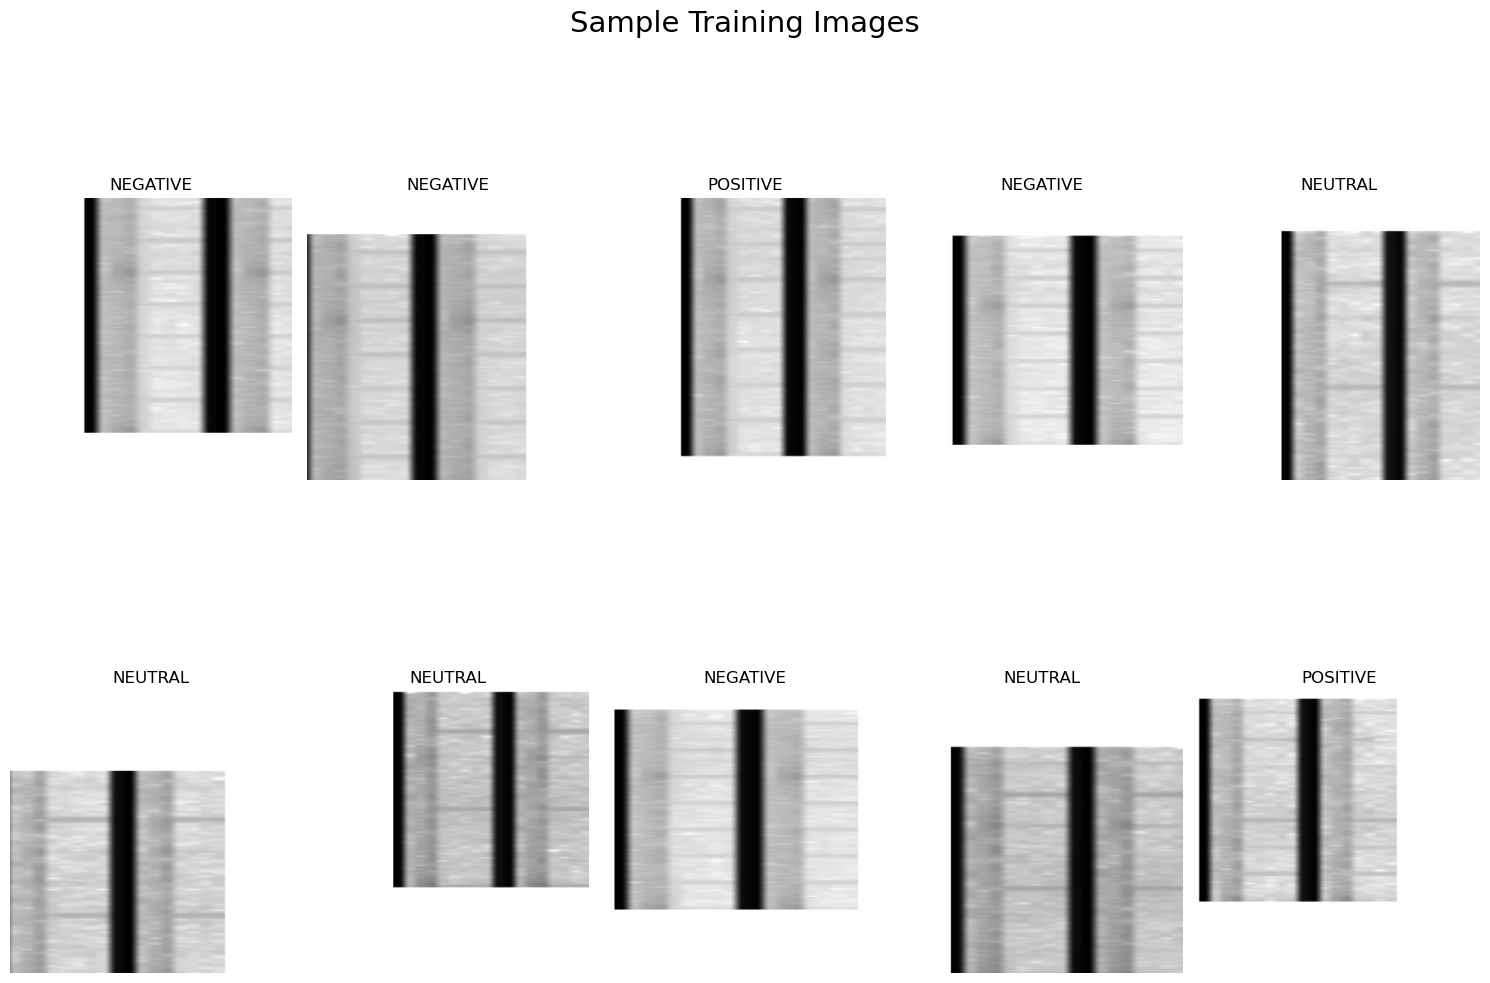

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [8]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=3, activation='softmax')
    ])
    
    return model

In [9]:
cnn_model = create_model()

In [10]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 356, 356, 128)     9728      
                                                                 
 activation (Activation)     (None, 356, 356, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 178, 178, 128)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 176, 176, 64)      0

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [12]:
optimizer = Adam(learning_rate=0.001)

In [13]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(train_generator, epochs=80, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/80
54/54 - 1334s - loss: 5.6439 - accuracy: 0.3556 - val_loss: 8.1640 - val_accuracy: 0.3271 - lr: 0.0010 - 1334s/epoch - 25s/step
Epoch 2/80
54/54 - 1297s - loss: 1.1202 - accuracy: 0.3457 - val_loss: 1.0948 - val_accuracy: 0.3318 - lr: 0.0010 - 1297s/epoch - 24s/step
Epoch 3/80
54/54 - 1189s - loss: 1.1048 - accuracy: 0.3950 - val_loss: 1.1036 - val_accuracy: 0.3505 - lr: 0.0010 - 1189s/epoch - 22s/step
Epoch 4/80
54/54 - 998s - loss: 1.0899 - accuracy: 0.4155 - val_loss: 1.0707 - val_accuracy: 0.5374 - lr: 0.0010 - 998s/epoch - 18s/step
Epoch 5/80
54/54 - 1027s - loss: 1.0835 - accuracy: 0.4184 - val_loss: 1.0766 - val_accuracy: 0.4790 - lr: 0.0010 - 1027s/epoch - 19s/step
Epoch 6/80
54/54 - 1115s - loss: 1.1173 - accuracy: 0.3803 - val_loss: 1.0577 - val_accuracy: 0.5047 - lr: 0.0010 - 1115s/epoch - 21s/step
Epoch 7/80
54/54 - 1071s - loss: 1.0887 - accuracy: 0.4278 - val_loss: 1.0158 - val_accuracy: 0.5257 - lr: 0.0010 - 1071s/epoch - 20s/step
Epoch 8/80
54/54 - 1131s - lo